# 

# PART 1: SQL

There are two tables in the included database

1. train_table
2. test_table


IMPORTANT: No other libraries are allowed to solve this tests only SQL Queries allowed

* pandas methods are not is not allowed
* sqlalchemy is not allowed

In [1]:
# only library allowed do not modify
import pandas as pd
from src.sql import execute_query

In [2]:
#example query inside docstring
execute_query("""
        SELECT * 
        FROM train_table
""")

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,set_type
0,0,7484,9996,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,train
1,1,3593,2338,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,train
2,2,12246,5091,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,train
3,3,5237,10266,None,16-03-2020,My food stock is not the only one which is emp...,Positive,train
4,4,14067,3014,None,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,train
...,...,...,...,...,...,...,...,...
41152,41152,10280,14781,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,train
41153,41153,10605,1158,None,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,train
41154,41154,4884,1029,None,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,train
41155,41155,9052,7736,None,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,train


In [3]:
#example query inside docstring
execute_query("""
        SELECT * 
        FROM test_table
""")

,index,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,set_type
0,0,5663,6254,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,test
1,1,12784,7766,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,test
2,2,3859,7150,None,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,test
3,3,6815,9068,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,test
4,4,1381,8708,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,test
...,...,...,...,...,...,...,...,...
3793,3793,7916,11906,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,test
3794,3794,14679,3726,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,test
3795,3795,6342,3112,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,test
3796,3796,13676,1776,None,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative,test


## question 1: Basic SQL
Write a SQL statement from table <i>train_table</i> to obtain the top 10 <i>locations</i> people twit from (in descending order)

In [4]:
# write query inside docstring
query_1 = """
select Location, count(1) tweets from train_table
group by Location
order by count(1) desc
limit 10
"""

In [5]:
result_1 = execute_query(query_1)

In [6]:
result_1

,Location,tweets
0,None,8590
1,London,540
2,United States,528
3,"London, England",520
4,"New York, NY",395
5,"Washington, DC",373
6,United Kingdom,337
7,"Los Angeles, CA",281
8,India,268
9,UK,232


## Question 2: Intermediate SQL


In [7]:
# write query inside docstring
query_2 = """
SELECT 
    UserName,
    SUM(CASE WHEN Sentiment = 'Positive' THEN 1 ELSE 0 END) AS pos_count,
    SUM(CASE WHEN Sentiment = 'Negative' THEN 1 ELSE 0 END) AS neg_count,
    SUM(CASE WHEN Sentiment = 'Extremely Positive' THEN 1 ELSE 0 END) AS extremely_pos_count,
    SUM(CASE WHEN Sentiment = 'Extremely Negative' THEN 1 ELSE 0 END) AS extremely_neg_count
FROM 
    train_table
GROUP BY 
    UserName;
"""

In [8]:
result_2 = execute_query(query_2)

In [9]:
result_2

,UserName,pos_count,neg_count,extremely_pos_count,extremely_neg_count
0,0,1,0,0,0
1,1,2,0,2,0
2,2,0,1,0,0
3,3,1,0,0,1
4,4,1,0,1,0
...,...,...,...,...,...
13994,14978,0,0,0,1
13995,14979,1,0,2,0
13996,14980,2,0,0,0
13997,14981,2,0,0,0


## Question 3: Medium SQL

In [10]:
# write query inside docstring
query_3 = """
SELECT 
    tweetAt, 
    CAST(
        (SUM(CASE WHEN Sentiment = 'Positive' THEN 1 ELSE 0 END) + 
         SUM(CASE WHEN Sentiment = 'Extremely Positive' THEN 1 ELSE 0 END)) AS FLOAT
    ) /
    NULLIF(
        (SUM(CASE WHEN Sentiment = 'Positive' THEN 1 ELSE 0 END) + 
         SUM(CASE WHEN Sentiment = 'Extremely Positive' THEN 1 ELSE 0 END) + 
         SUM(CASE WHEN Sentiment = 'Negative' THEN 1 ELSE 0 END) + 
         SUM(CASE WHEN Sentiment = 'Extremely Negative' THEN 1 ELSE 0 END)), 0
    ) AS pos_rate
FROM 
    train_table
GROUP BY 
    tweetAt
ORDER BY 
    tweetAt;


"""

In [11]:
result_3 = execute_query(query_3)

In [12]:
result_3

,TweetAt,pos_rate
0,01-04-2020,0.512871
1,02-04-2020,0.520584
2,03-04-2020,0.525915
3,04-04-2020,0.566719
4,05-04-2020,0.573661
5,06-04-2020,0.544139
6,07-04-2020,0.550034
7,08-04-2020,0.589050
8,09-04-2020,0.605396
9,10-04-2020,0.592689


## Question 4: SQL + pandas + plotting

<p>Expected result:</p>
<img src="data/plot_result.png">

In [13]:
def plot(df: pd.DataFrame):
    # Copy the DataFrame to avoid modifying the original
    temp_df = df.copy()

    # Verify and convert the date column to the correct format
    date_column = 'TweetAt'
    temp_df[date_column] = pd.to_datetime(temp_df[date_column], dayfirst=True)

    # Set the date column as the index
    temp_df.set_index(date_column, inplace=True)

    # Resample data by day and calculate the mean
    daily_mean = temp_df['pos_rate'].resample('D').mean()

    # Plot
    daily_mean.plot(title="Positive Sentiment Rate Over Time", ylabel="Positive Rate", xlabel="Date")


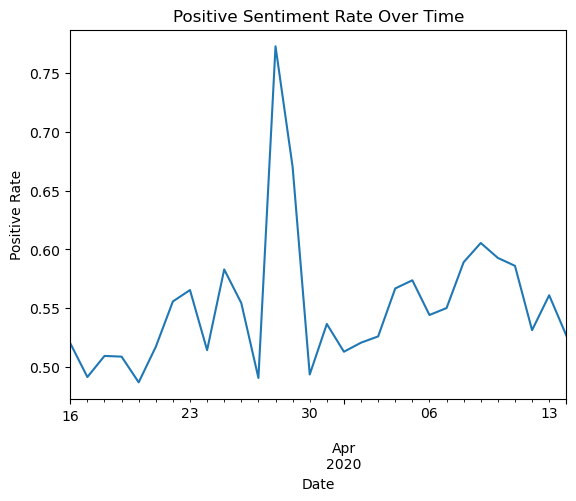

In [14]:
plot(result_3)

# PART 2: Object Oriented Programming + Data Wrangling

## Question 5

In [15]:
# example template for class

import csv
from datetime import datetime
from math import isnan, sqrt

class Data:
    def __init__(self, data):
        """
        Initialize the Data object with the cleaned and parsed data.
        """
        self.data = data

    def infer_dtypes(self):
        """
        Infer data types for each column in the dataset.
        Data types include: date, integer, float, or string.
        """
        dtypes = {}

        for col in self.data[0].keys():
            col_data = [row[col] for row in self.data if row[col] != "NaN"]
            
            is_date = all(self._is_date(val) for val in col_data)
            if is_date:
                dtypes[col] = "date"
                continue

            is_int = all(self._is_int(val) for val in col_data)
            if is_int:
                dtypes[col] = "integer"
                continue

            is_float = all(self._is_float(val) for val in col_data)
            if is_float:
                dtypes[col] = "float"
                continue

            dtypes[col] = "string"

        return dtypes

    def describe(self):
        """
        Compute basic statistics (mean, std, max, min) for numerical columns.
        """
        stats = {}
        for col in self.data[0].keys():
            col_data = [float(row[col]) for row in self.data if self._is_float(row[col])]
            if col_data:
                mean = sum(col_data) / len(col_data)
                variance = sum((x - mean) ** 2 for x in col_data) / len(col_data)
                std = sqrt(variance)
                stats[col] = {
                    "mean": mean,
                    "std": std,
                    "max": max(col_data),
                    "min": min(col_data),
                }
        return stats

    @staticmethod
    def _is_date(value):
        """Check if a value can be parsed as a date."""
        try:
            datetime.strptime(value, "%Y-%m-%d")
            return True
        except (ValueError, TypeError):
            return False

    @staticmethod
    def _is_int(value):
        """Check if a value is an integer."""
        try:
            int(value)
            return True
        except (ValueError, TypeError):
            return False

    @staticmethod
    def _is_float(value):
        """Check if a value is a float."""
        try:
            float(value)
            return True
        except (ValueError, TypeError):
            return False


class DataReader:
    def read_csv(self, file_path):
        """
        Load the CSV file, clean the data, and return a Data object.
        """
        data = []
        with open(file_path, "r", encoding="utf-8") as file:
            reader = csv.DictReader(file)

            for row in reader:
                cleaned_row = {}
                for key, value in row.items():
                    if value.strip() == "" or value is None:
                        cleaned_row[key] = "NaN"
                    else:
                        try:
                            cleaned_row[key] = value.strip()
                        except AttributeError:
                            cleaned_row[key] = "NaN"
                data.append(cleaned_row)

        return Data(data)

# Example usage
data_reader = DataReader()
data = data_reader.read_csv("data\malformed_dataset.csv")
print(data.infer_dtypes())
print(data.describe())

{'\ufeffDateTime': 'string', 'Humidity': 'integer', 'Temperature': 'string', 'Temperature_range (low)': 'string', 'Temperature_range (high)': 'string'}
{'\ufeffDateTime': {'mean': nan, 'std': nan, 'max': nan, 'min': nan}, 'Humidity': {'mean': 48.51977401129943, 'std': 5.181551798928015, 'max': 59.0, 'min': 37.0}, 'Temperature': {'mean': nan, 'std': nan, 'max': 29.21, 'min': 18.04}, 'Temperature_range (low)': {'mean': 20.563739376770553, 'std': 2.4006348688285177, 'max': 28.2, 'min': 14.9}, 'Temperature_range (high)': {'mean': 23.55373563218391, 'std': 1.70530371420925, 'max': 31.1, 'min': 19.7}}
